In [47]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [48]:
train_labels=[]
train_samples=[]

In [49]:
for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [50]:
 train_labels=np.array(train_labels)
 train_samples=np.array(train_samples)
 train_labels,train_samples=shuffle(train_labels,train_samples)

In [51]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [62]:
predictions=model.predict(x=scaled_train_samples,batch_size=10,verbose=0)

In [63]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [53]:
test_labels=[]
test_samples=[]

In [54]:
for i in range(10):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [55]:
 test_labels=np.array(test_labels)
 test_samples=np.array(test_samples)
 test_labels,test_samples=shuffle(test_labels,test_samples)

In [66]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [67]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [69]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [64]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [70]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [80]:
def plot_confusion_matrix(cm,classes,
                    normalize=False,
                    title='Confusion Matrix',
                    cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalised Confusion Matrix')
  else:
    print('Confusion matrix , without normalisation')

  print(cm)


  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix , without normalisation
[[196  14]
 [ 10 200]]


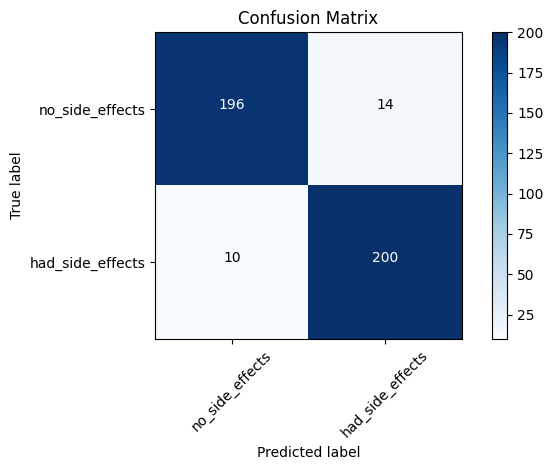

In [81]:
cm_plot_labels=['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [83]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  0


IndexError: ignored

In [84]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [87]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7048 - accuracy: 0.4413 - val_loss: 0.6873 - val_accuracy: 0.5095 - 815ms/epoch - 4ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6731 - accuracy: 0.5307 - val_loss: 0.6599 - val_accuracy: 0.5571 - 258ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6475 - accuracy: 0.6032 - val_loss: 0.6308 - val_accuracy: 0.6333 - 224ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6138 - accuracy: 0.7095 - val_loss: 0.5970 - val_accuracy: 0.7476 - 217ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5830 - accuracy: 0.7603 - val_loss: 0.5687 - val_accuracy: 0.7619 - 222ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5552 - accuracy: 0.7825 - val_loss: 0.5414 - val_accuracy: 0.7905 - 316ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5276 - accuracy: 0.8148 - val_loss: 0.5144 - val_accuracy: 0.8190 - 288ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5009 - accuracy: 0.8317 - val_loss: 0.4886 - val_accuracy: 0.8238 - 286ms/epoch - 2ms/step
